In [4]:
"""Регрессия на реальных данных"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [18]:
# Преобразуем в data frame
data = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
# Добавляем значение целевой переменной
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
# Перед машинным обучением смотрим дата сет глазами. Что означает каждая колонка? Какие единицы измерений? Насколько отличаются данные в начале таблицы и в конце? Также через data.info() смотрим сводную информацию. Видно, что данные удовлетворяют требованию чистоты (нет пропусков, ...), и не требуют очистки.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
# Статистика по всем данным
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [28]:
# Часто данные сначала собираются в один data frame, и он уже дальше анализируется. Поэтому для примера вынесем "y: в отдельную переменную и удалим "y" из data frame.
y = data['Price']
X = data.drop('Price', axis=1)

In [29]:
y.shape, X.shape

((20640,), (20640, 8))

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [38]:
print(f'Коэффициент детерминации: {model.score(X, y)}')
print(f'Коэффициенты модели:\n{model.coef_}')

Коэффициент детерминации: 0.606232685199805
Коэффициенты модели:
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [43]:
# Вывод названий переменных и коэффициентов
_ = [print(k, v) for k, v in zip(california.feature_names, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [44]:
y_pred = model.predict(X)

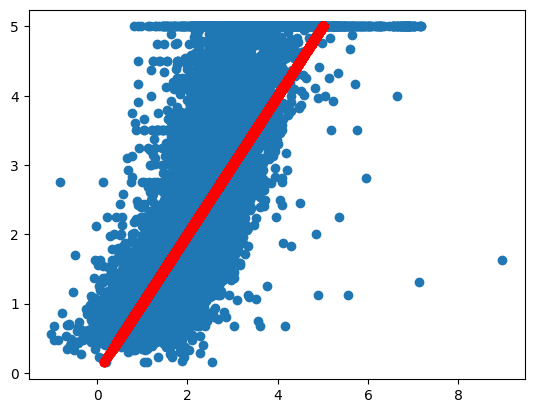

In [45]:
# Строим диаграмму рассеяния и референсную линию для визуальной оценки.
# В ней видна аномалия на уровне 5 тыс долларов. Скорее всего исходные данные были подготовлены
# так, что все что выше 5 тыс, превратили в 5 тыс. И это стало видно только на графике.
plt.scatter(y_pred, y)
plt.scatter(y, y, color='red')